# Regular solutions

This follows Figure 10 of Pelton and Thompson \[1\]

\[1\] A.D. Pelton, W.T. Thompson, Phase diagrams, Progress in Solid State Chemistry, 10(3) (1975) 119-155 doi: [10.1016/0079-6786(75)90004-7](https://doi.org/10.1016/0079-6786(75)90004-7)

In [1]:
SOLN_TDB = """

ELEMENT A ALPHA 0.0 0.0 0.0 !
ELEMENT B ALPHA 0.0 0.0 0.0 !

TYPE_DEFINITION % SEQ *!    

PHASE ALPHA % 1 1 !
CONSTITUENT ALPHA : A B : !

PHASE BETA % 1 1 !
CONSTITUENT BETA : A B : !

$ Melting temperatures in Kelvin
FUNCTION TM_A 1 800; 10000 N !
FUNCTION TM_B 1 1200; 10000 N !

$ Entropy of melting
FUNCTION SM_A 1 10; 10000 N !
FUNCTION SM_B 1 10; 10000 N !

$ Regular solution parameters
$ Initial values are zero (ideal)
FUNCTION L_ALPHA 1 0.0; 10000 N !
FUNCTION L_BETA 1 0.0; 10000 N !

$ Set the ALPHA lattice stability to zero
PARAMETER G(ALPHA,A;0) 1 0.0; 10000 N !
PARAMETER G(ALPHA,B;0) 1 0.0; 10000 N !

$ Set the BETA lattice stability to melt A and B at TM, assuming G(ALPHA,*)=0
$ At TM, 0 = A - B*T, so A = BT
PARAMETER G(BETA,A;0) 1 SM_A*TM_A - SM_A*T; 10000 N !
PARAMETER G(BETA,B;0) 1 SM_B*TM_B - SM_B*T; 10000 N !

$ Regular solution energy terms
PARAMETER L(ALPHA,A,B;0) 1 L_ALPHA; 10000 N !
PARAMETER L(BETA,A,B;0) 1 L_BETA; 10000 N !

"""

In [2]:
from pycalphad import Database, calculate, equilibrium, binplot, variables as v
import matplotlib.pyplot as plt

In [3]:
dbf = Database(SOLN_TDB)

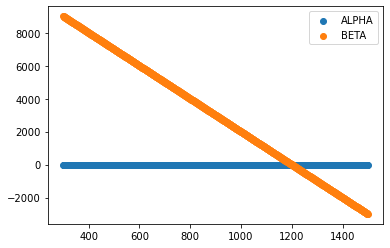

In [20]:
for phase_name in ['ALPHA', 'BETA']:
    cr = calculate(dbf, ['B',], phase_name, N=1, P=101325, T=(300, 1500, 1))
    plt.scatter(cr.T, cr.GM.squeeze(), label=phase_name)
plt.legend()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


(300.0, 1500.0)

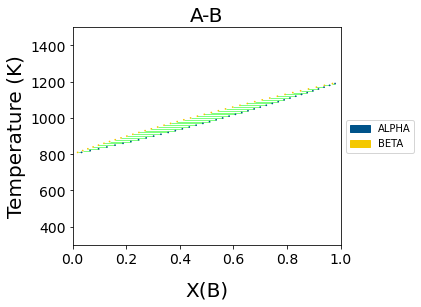

In [25]:
fig = plt.figure()
ax = fig.gca()
binplot(dbf, ['A', 'B'], ['ALPHA', 'BETA'], {v.N: 1, v.P: 101325, v.T: (300, 1500, 10), v.X('B'): (0, 1, 0.005)}, plot_kwargs={'ax': ax})
ax.set_xlim(0, 1)
ax.set_ylim(300, 1500)

(300.0, 1500.0)

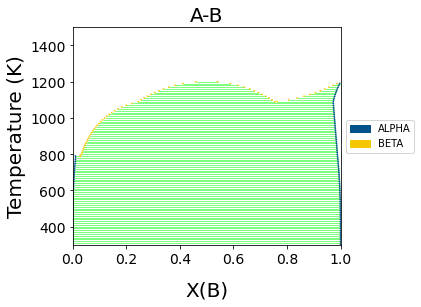

In [27]:
fig = plt.figure()
ax = fig.gca()
binplot(dbf, ['A', 'B'], ['ALPHA', 'BETA'], {v.N: 1, v.P: 101325, v.T: (300, 1500, 10), v.X('B'): (0, 1, 0.005)}, plot_kwargs={'ax': ax}, eq_kwargs={'parameters': {'L_ALPHA': 30000, 'L_BETA': 20000}})
ax.set_xlim(0, 1)
ax.set_ylim(300, 1500)

(300.0, 1500.0)

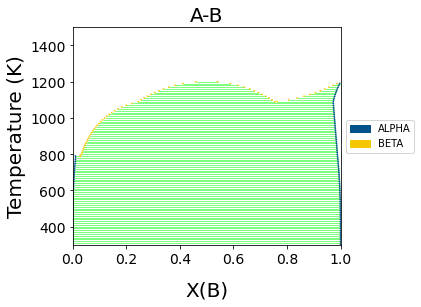

In [28]:
CONDITIONS = {v.N: 1, v.P: 101325, v.T: (300, 1500, 10), v.X('B'): (0, 1, 0.005)}

fig = plt.figure()
ax = fig.gca()

# Override the excess parameters
parameters = {'L_ALPHA': 30000, 'L_BETA': 20000}

binplot(dbf, ['A', 'B'], ['ALPHA', 'BETA'], CONDITIONS, plot_kwargs={'ax': ax}, eq_kwargs={'parameters': parameters})
ax.set_xlim(0, 1)
ax.set_ylim(300, 1500)

CPU times: user 3.11 s, sys: 116 ms, total: 3.22 s
Wall time: 3.23 s


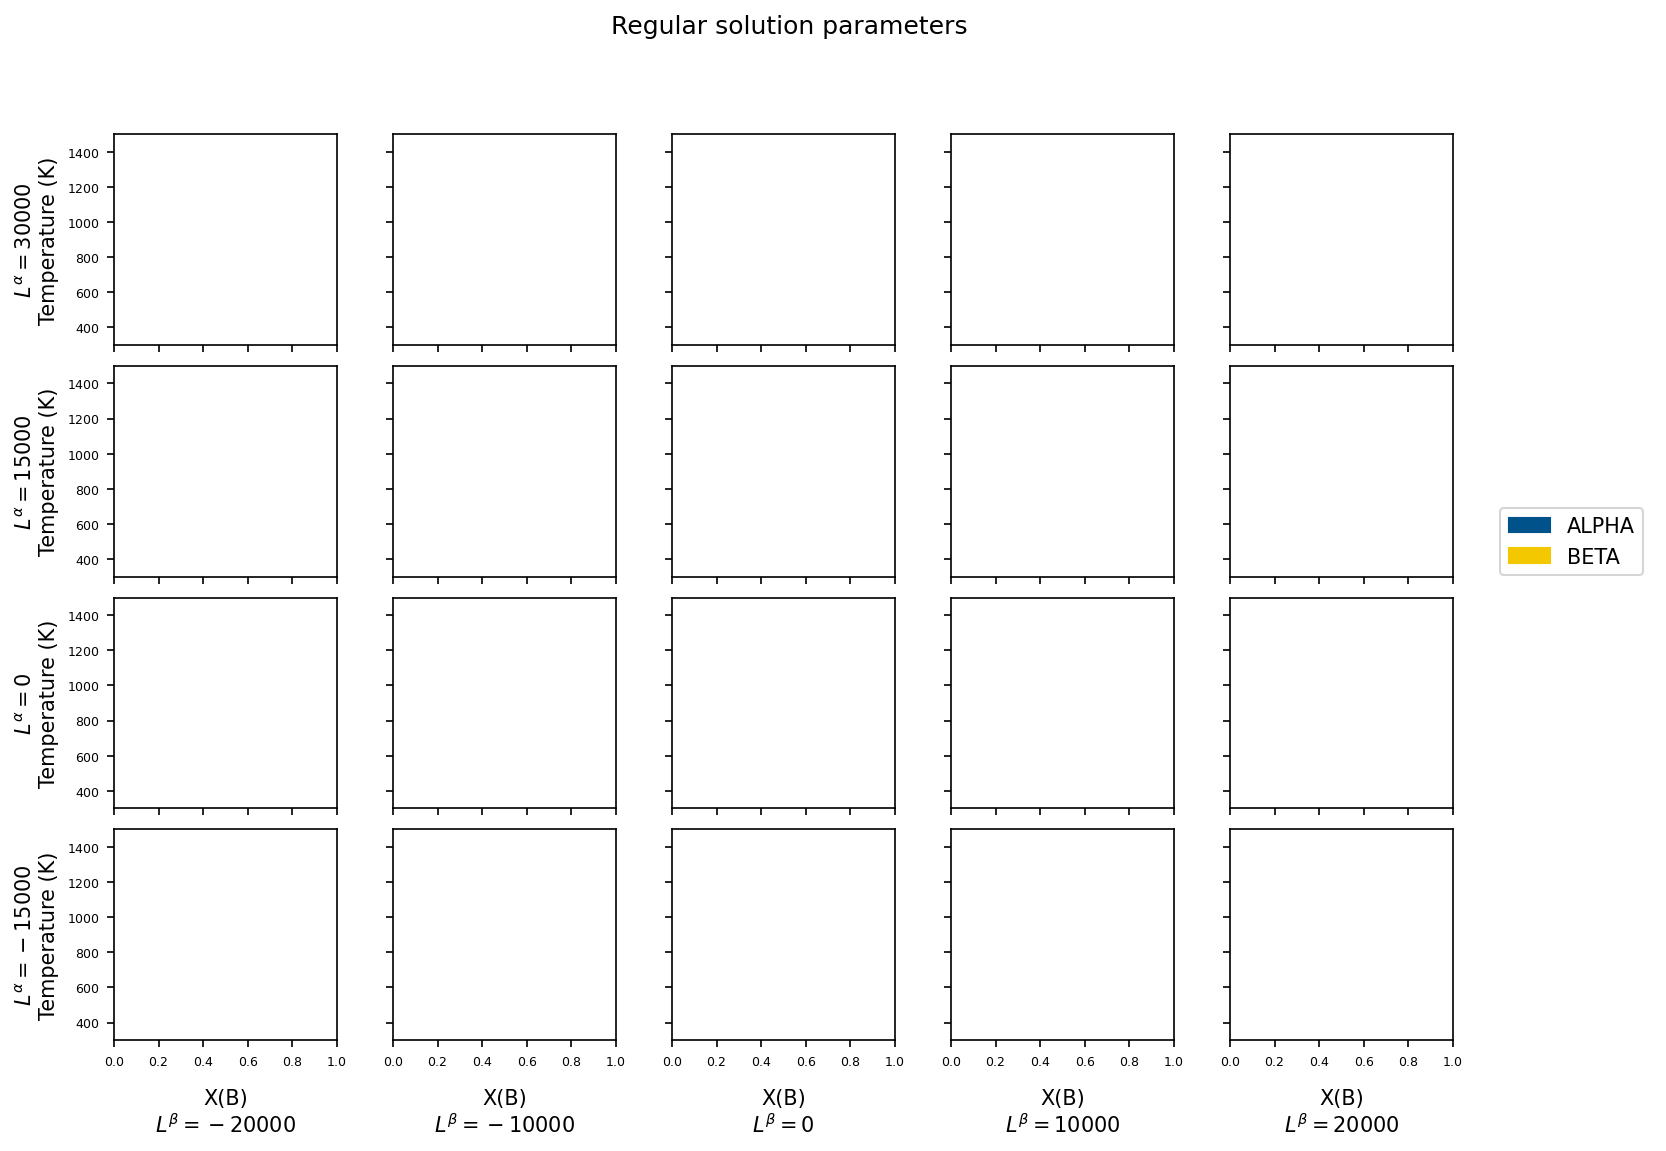

In [4]:
%%time
CONDITIONS = {v.N: 1, v.P: 101325, v.T: (300, 1500, 10), v.X('B'): (0, 1, 0.002)}
CONDITIONS = {v.N: 1, v.P: 101325, v.T: (300, 1500, 500), v.X('B'): (0, 1, 0.5)}
L_ALPHAs = [-15000, 0, 15000, 30000]
L_BETAs = [-20000, -10000, 0, 10000, 20000]

fig, subplots = plt.subplots(nrows=len(L_ALPHAs), ncols=len(L_BETAs), sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.0}, dpi=150, figsize=(12, 8))
for idx_A in range(len(L_ALPHAs)):
    for idx_B in range(len(L_BETAs)):
        ax = subplots[idx_A][idx_B]
        # Need to reverse columns so they go in ascending order
        parameters = parameters = {'L_ALPHA': list(reversed(L_ALPHAs))[idx_A], 'L_BETA': L_BETAs[idx_B]}
        binplot(dbf, ['A', 'B'], ['ALPHA', 'BETA'], CONDITIONS, plot_kwargs={'ax': ax}, eq_kwargs={'parameters': parameters})
        ax.set_xlim(0, 1)
        ax.set_ylim(300, 1500)
        # Binplot generates titles and legends automatically. Remove them here.
        ax.legend([]).remove()
        ax.set_title(None)
        # Set the labels
        ax.tick_params(labelsize=6)
        ax.set_xlabel(f"X(B)\n$L^{{\\beta}}={parameters['L_BETA']}$", fontsize=10, labelpad=10)
        ax.set_ylabel(f"$L^{{\\alpha}}={parameters['L_ALPHA']}$\nTemperature (K)", fontsize=10)

        
# Hide axis and tick labels for all but the bottom and left edges
for ax in subplots.flat:
    ax.label_outer()
    
fig.suptitle('Regular solution parameters')
from pycalphad.plot.utils import phase_legend
fig.legend(handles=phase_legend(['ALPHA', 'BETA'])[0], loc=(0.9, 0.5))